# Метрики для оценки ASR моделей

В нашем пайплайне для оценки распознавания речи мы используем следующие метрики:


**1. WER (Word Error Rate) — Ошибка слов**

**Что измеряет:**  
WER показывает долю слов, которые были распознаны неправильно.  
Она учитывает:

- **Замены (Substitutions)** – когда одно слово заменено другим.  
- **Удаления (Deletions)** – когда слово пропущено.  
- **Вставки (Insertions)** – когда модель добавила лишнее слово.

**Формула:**  
\[
WER = \frac{S + D + I}{N}
\]  
где:  
- \(S\) — количество замен  
- \(D\) — количество удалений  
- \(I\) — количество вставок  
- \(N\) — общее количество слов в эталонной транскрипции

**Интерпретация:**  
- WER = 0 → распознано идеально  
- WER = 1 → распознано полностью неверно  

**2. CER (Character Error Rate) — Ошибка символов**

**Что измеряет:**  
CER аналогична WER, но считается **на уровне символов**, а не слов.  
Полезна для языков с длинными словами или для оценки моделей с тонкими ошибками (например, опечатки).

**Формула:**  
\[
CER = \frac{S + D + I}{N}
\]  
где:  
- \(S\) — количество замен символов  
- \(D\) — количество удалений  
- \(I\) — количество вставок  
- \(N\) — общее количество символов в эталонной транскрипции

**Интерпретация:**  
- CER = 0 → идеально  
- CER = 1 → полностью неверно  


**1. Доустановка и настройка**

In [1]:
# Install all required dependencies
%pip install faster-whisper vosk  jiwer librosa soundfile pandas matplotlib seaborn pydub ffmpeg-python -q
print("Все зависимости успешно установлены!")

Note: you may need to restart the kernel to use updated packages.
Все зависимости успешно установлены!


**2. Подготовка тестовых аудио данных**

In [19]:
import os
import shutil

# Пути
main_audio_folder = r"C:\Users\asus\Desktop\7\aud\audio"
domain_audio_folder = r"C:\Users\asus\Desktop\7\aud\domain_audio"
output_base = r"C:\Users\asus\Desktop\7\aud"

# Создаем папки для выходных данных
prepared_audio = os.path.join(output_base, "audio")
prepared_domain_audio = os.path.join(output_base, "domain_audio")
transcripts_folder = os.path.join(output_base, "transcripts")
domain_transcripts_folder = os.path.join(output_base, "domain_transcripts")

for folder in [prepared_audio, prepared_domain_audio, transcripts_folder, domain_transcripts_folder]:
    os.makedirs(folder, exist_ok=True)

# Основные тестовые фразы
test_phrases = [
    "Привет, как дела?",
    "Спорт помогает сохранять здоровье",
    "Сегодня хорошая погода для прогулки",
    "Москва - столица России",
    "Технологии искусственного интеллекта развиваются быстро",
    "Я люблю программировать на Python",
    "Машинное обучение это интересно",
    "В городе открыли новый парк",
    "Река течет спокойно и медленно",
    "Ученые сделали важное открытие",
    
]

# Доменные термины
domain_phrases = [
    "Антитела иммуноглобулина G показали положительный результат",
    "Проведите диагностику мультиспектрального сенсора",
    "Квантовая суперпозиция требует когерентности",
    "Трансформаторная архитектура улучшает NLP модели",
    "Гиперпараметрическая оптимизация ускоряет обучение"
]

print("=== КОПИРОВАНИЕ ОСНОВНЫХ АУДИО ===")
main_files = sorted([f for f in os.listdir(main_audio_folder) if f.endswith('.wav')])
for i, filename in enumerate(main_files, 1):
    if i > len(test_phrases):
        break
    src = os.path.join(main_audio_folder, filename)
    dst = os.path.join(prepared_audio, f"audio_{i}.wav")
    shutil.copy2(src, dst)
    print(f"Скопирован: audio_{i}.wav")
    
    # Создаем транскрипт
    with open(os.path.join(transcripts_folder, f"audio_{i}.txt"), 'w', encoding='utf-8') as f:
        f.write(test_phrases[i-1])
    print(f"Создан транскрипт: audio_{i}.txt")

print("\n=== КОПИРОВАНИЕ ДОМЕННЫХ АУДИО ===")
domain_files = sorted([f for f in os.listdir(domain_audio_folder) if f.endswith('.wav')])
for i, filename in enumerate(domain_files, 1):
    if i > len(domain_phrases):
        break
    src = os.path.join(domain_audio_folder, filename)
    dst = os.path.join(prepared_domain_audio, f"domain_{i}.wav")
    shutil.copy2(src, dst)
    print(f"Скопирован: domain_{i}.wav")
    
    # Создаем транскрипт
    with open(os.path.join(domain_transcripts_folder, f"domain_{i}.txt"), 'w', encoding='utf-8') as f:
        f.write(domain_phrases[i-1])
    print(f"Создан транскрипт: domain_{i}.txt")

print(f"\nГОТОВО! Файлы подготовлены в: {output_base}")

=== КОПИРОВАНИЕ ОСНОВНЫХ АУДИО ===
Скопирован: audio_1.wav
Создан транскрипт: audio_1.txt
Скопирован: audio_2.wav
Создан транскрипт: audio_2.txt
Скопирован: audio_3.wav
Создан транскрипт: audio_3.txt
Скопирован: audio_4.wav
Создан транскрипт: audio_4.txt
Скопирован: audio_5.wav
Создан транскрипт: audio_5.txt
Скопирован: audio_6.wav
Создан транскрипт: audio_6.txt
Скопирован: audio_7.wav
Создан транскрипт: audio_7.txt
Скопирован: audio_8.wav
Создан транскрипт: audio_8.txt
Скопирован: audio_9.wav
Создан транскрипт: audio_9.txt
Скопирован: audio_10.wav
Создан транскрипт: audio_10.txt

=== КОПИРОВАНИЕ ДОМЕННЫХ АУДИО ===
Скопирован: domain_1.wav
Создан транскрипт: domain_1.txt
Скопирован: domain_2.wav
Создан транскрипт: domain_2.txt
Скопирован: domain_3.wav
Создан транскрипт: domain_3.txt
Скопирован: domain_4.wav
Создан транскрипт: domain_4.txt
Скопирован: domain_5.wav
Создан транскрипт: domain_5.txt

ГОТОВО! Файлы подготовлены в: C:\Users\asus\Desktop\7\aud


In [21]:
import os
import librosa
import soundfile as sf
from pathlib import Path

def convert_audio_to_16k(input_path, output_path):
    """
    Конвертирует аудио файл в формат 16kHz моно WAV
    
    Args:
        input_path: путь к исходному аудио файлу
        output_path: путь для сохранения конвертированного файла
    """
    try:
        # Загружаем аудио с пересэмплированием до 16kHz
        y, sr = librosa.load(input_path, sr=16000, mono=True)
        
        # Сохраняем в WAV формате
        sf.write(output_path, y, sr, subtype='PCM_16')
        
        print(f"Успешно конвертирован: {input_path} -> {output_path}")
        return True
        
    except Exception as e:
        print(f"Ошибка при конвертации {input_path}: {e}")
        return False

def batch_convert_audio(input_dir, output_dir, file_extensions=['.wav', '.mp3', '.m4a', '.flac', '.ogg']):
    """
    Пакетная конвертация всех аудио файлов в директории
    
    Args:
        input_dir: директория с исходными аудио файлами
        output_dir: директория для сохранения конвертированных файлов
        file_extensions: список поддерживаемых расширений файлов
    """
    # Создаем выходную директорию если её нет
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Ищем все аудио файлы
    audio_files = []
    for ext in file_extensions:
        audio_files.extend(Path(input_dir).glob(f"*{ext}"))
        audio_files.extend(Path(input_dir).glob(f"*{ext.upper()}"))
    
    print(f"Найдено {len(audio_files)} аудио файлов для конвертации")
    
    success_count = 0
    for input_file in audio_files:
        # Создаем путь для выходного файла
        output_file = Path(output_dir) / f"{input_file.stem}_16k.wav"
        
        # Конвертируем
        if convert_audio_to_16k(str(input_file), str(output_file)):
            success_count += 1
    
    print(f"\nКонвертация завершена: {success_count}/{len(audio_files)} файлов успешно обработано")

def check_audio_properties(audio_path):
    """
    Проверяет свойства аудио файла
    """
    try:
        y, sr = librosa.load(audio_path, sr=None)  # Загружаем с оригинальной частотой
        duration = len(y) / sr
        
        print(f"Файл: {audio_path}")
        print(f"  Частота дискретизации: {sr} Hz")
        print(f"  Количество каналов: {y.shape[0] if len(y.shape) > 1 else 1}")
        print(f"  Длительность: {duration:.2f} секунд")
        print(f"  Размерность данных: {y.shape}")
        
        return sr, y.shape[0] if len(y.shape) > 1 else 1
        
    except Exception as e:
        print(f"Ошибка при проверке {audio_path}: {e}")
        return None, None

def main():
    # Основные директории
    base_dir = r"C:\Users\asus\Desktop\7\aud"
    
    # Директории с исходными аудио
    audio_dirs = [
        os.path.join(base_dir, "audio"),
        os.path.join(base_dir, "domain_audio")
    ]
    
    # Директории для конвертированных аудио
    converted_dirs = [
        os.path.join(base_dir, "audio_converted"),
        os.path.join(base_dir, "domain_audio_converted")
    ]
    
    # Проверяем и конвертируем каждую директорию
    for input_dir, output_dir in zip(audio_dirs, converted_dirs):
        if os.path.exists(input_dir):
            print(f"\n{'='*50}")
            print(f"Обрабатываю директорию: {input_dir}")
            print(f"{'='*50}")
            
            # Сначала проверяем свойства исходных файлов
            print("Проверка свойств исходных файлов:")
            audio_files = list(Path(input_dir).glob("*.wav")) + list(Path(input_dir).glob("*.mp3"))
            
            for audio_file in audio_files[:3]:  # Проверяем первые 3 файла как пример
                check_audio_properties(str(audio_file))
                print("-" * 30)
            
            # Затем конвертируем все файлы
            print("\nНачинаю конвертацию...")
            batch_convert_audio(input_dir, output_dir)
        else:
            print(f"Директория {input_dir} не найдена, пропускаем")

    print("\n" + "="*50)
    print("ВСЕ ОПЕРАЦИИ ЗАВЕРШЕНЫ!")
    print("="*50)

if __name__ == "__main__":
    main()


Обрабатываю директорию: C:\Users\asus\Desktop\7\aud\audio
Проверка свойств исходных файлов:
Файл: C:\Users\asus\Desktop\7\aud\audio\1.wav
  Частота дискретизации: 48000 Hz
  Количество каналов: 1
  Длительность: 1.25 секунд
  Размерность данных: (59951,)
------------------------------
Файл: C:\Users\asus\Desktop\7\aud\audio\10.wav
  Частота дискретизации: 48000 Hz
  Количество каналов: 1
  Длительность: 2.18 секунд
  Размерность данных: (104879,)
------------------------------
Файл: C:\Users\asus\Desktop\7\aud\audio\2.wav
  Частота дискретизации: 48000 Hz
  Количество каналов: 1
  Длительность: 2.45 секунд
  Размерность данных: (117551,)
------------------------------

Начинаю конвертацию...
Найдено 40 аудио файлов для конвертации
Успешно конвертирован: C:\Users\asus\Desktop\7\aud\audio\1.wav -> C:\Users\asus\Desktop\7\aud\audio_converted\1_16k.wav
Успешно конвертирован: C:\Users\asus\Desktop\7\aud\audio\10.wav -> C:\Users\asus\Desktop\7\aud\audio_converted\10_16k.wav
Успешно конверти

**3. Основной код сравнения ASR-движков**

In [9]:
import librosa
import numpy as np
from faster_whisper import WhisperModel
from vosk import Model, KaldiRecognizer
import json
import time
from jiwer import wer, cer
import wave
import os
import warnings
from typing import Dict, Tuple

import gigaam

warnings.filterwarnings('ignore')


class ASREvaluator:
    def __init__(self):
        print("Инициализирую ASR модели...")

        # ------------------- Whisper -------------------
        print("Загружаю Whisper модель...")
        self.whisper_model = WhisperModel("base", device="cpu", compute_type="int8")

        # ------------------- Vosk -------------------
        print("Загружаю Vosk модель...")
        try:
            vosk_model_path = r"/home/user/Desktop/aud/vosk-model-small-ru-0.22"
            if os.path.exists(vosk_model_path):
                self.vosk_model = Model(vosk_model_path)
                print("Vosk модель успешно загружена")
            else:
                print("Не удалось найти модель Vosk по указанному пути. Vosk будет отключен.")
                self.vosk_model = None
        except Exception as e:
            print(f"Ошибка инициализации Vosk: {e}")
            self.vosk_model = None

        # ------------------- GigaAM -------------------
        self.gigaam_model = None
        self.gigaam_initialized = False

    # --------------------------------------------------------------------------
    # GigaAM инициализация
    # --------------------------------------------------------------------------
    def initialize_gigaam(self):
        """Загружает GigaAM-ctc через официальный пакет gigaam"""
        try:
            import torch
            from omegaconf.base import ContainerMetadata
            torch.serialization.add_safe_globals([ContainerMetadata])

            print("Загружаю GigaAM-ctc через официальный пакет gigaam...")
            self.gigaam_model = gigaam.load_model("ctc")
            self.gigaam_initialized = True
            print("GigaAM-ctc успешно загружена.")
        except Exception as e:
            print(f"Не удалось загрузить GigaAM-ctc: {e}")
            self.gigaam_initialized = False


    # --------------------------------------------------------------------------
    # Whisper транскрибация
    # --------------------------------------------------------------------------
    def transcribe_whisper(self, audio_path: str, prompt: str = None) -> Tuple[str, float]:
        start_time = time.time()
        try:
            segments, info = self.whisper_model.transcribe(
                audio_path,
                beam_size=5,
                initial_prompt=prompt,
                language='ru'
            )
            text = " ".join([segment.text for segment in segments]).strip()
            duration = self.get_audio_duration(audio_path)
            rtf = (time.time() - start_time) / duration if duration > 0 else 0
            return text, rtf
        except Exception as e:
            print(f"Ошибка Whisper: {e}")
            return "", 0

    # --------------------------------------------------------------------------
    # Vosk транскрибация
    # --------------------------------------------------------------------------
    def transcribe_vosk(self, audio_path: str) -> Tuple[str, float]:
        if self.vosk_model is None:
            return "Vosk модель недоступна", 0

        start_time = time.time()
        try:
            wf = wave.open(audio_path, "rb")
            if wf.getnchannels() != 1:
                raise ValueError("Аудио должно быть моно")
            if wf.getsampwidth() != 2:
                raise ValueError("Аудио должно быть 16-битным")
            if wf.getcomptype() != "NONE":
                raise ValueError("Аудио должно быть несжатым")

            rec = KaldiRecognizer(self.vosk_model, wf.getframerate())
            rec.SetWords(True)

            results = []
            while True:
                data = wf.readframes(4000)
                if len(data) == 0:
                    break
                if rec.AcceptWaveform(data):
                    result = json.loads(rec.Result())
                    text = result.get('text', '')
                    if text:
                        results.append(text)

            final_result = json.loads(rec.FinalResult())
            final_text = final_result.get('text', '')
            if final_text:
                results.append(final_text)

            text = " ".join(results).strip()
            duration = self.get_audio_duration(audio_path)
            rtf = (time.time() - start_time) / duration if duration > 0 else 0
            return text, rtf
        except Exception as e:
            print(f"Ошибка Vosk: {e}")
            return "", 0

    # --------------------------------------------------------------------------
    # GigaAM транскрибация
    # --------------------------------------------------------------------------
    def transcribe_gigaam(self, audio_path: str) -> Tuple[str, float]:
        if not self.gigaam_initialized:
            self.initialize_gigaam()
        if not self.gigaam_initialized:
            return "GigaAM недоступен", 0

        audio_path = str(os.path.abspath(audio_path))  # гарантируем абсолютный путь
        if not os.path.exists(audio_path):
            print(f"[ОШИБКА] Аудио файл не найден: {audio_path}")
            return "", 0

        start_time = time.time()
        try:
            text = self.gigaam_model.transcribe(audio_path)
            if isinstance(text, dict) and "text" in text:
                text = text["text"]
            duration = self.get_audio_duration(audio_path)
            rtf = (time.time() - start_time) / duration if duration > 0 else 0
            return str(text).strip(), rtf
        except Exception as e:
            print(f"Ошибка GigaAM при транскрибации: {e}")
            return "", 0


    # --------------------------------------------------------------------------
    # Длительность аудио
    # --------------------------------------------------------------------------
    def get_audio_duration(self, audio_path: str) -> float:
        try:
            y, sr = librosa.load(audio_path, sr=16000)
            return len(y) / sr
        except:
            return 0

    # --------------------------------------------------------------------------
    # Метрики WER/CER
    # --------------------------------------------------------------------------
    def evaluate_metrics(self, reference: str, hypothesis: str) -> Dict[str, float]:
        if not reference or not hypothesis:
            return {'wer': 1.0, 'cer': 1.0}
        try:
            return {'wer': wer(reference.lower(), hypothesis.lower()),
                    'cer': cer(reference.lower(), hypothesis.lower())}
        except:
            return {'wer': 1.0, 'cer': 1.0}


# --------------------------------------------------------------------------
# Основная оценка (10 аудио)
# --------------------------------------------------------------------------
def run_main_evaluation():
    evaluator = ASREvaluator()
    audio_files = [os.path.abspath(os.path.join( f"audio_converted/audio_{i}_16k.wav")) for i in range(1, 11)]
    reference_files = [f"transcripts/audio_{i}.txt" for i in range(1, 11)]

    results = {}

    for i, (audio_file, ref_file) in enumerate(zip(audio_files, reference_files), 1):
        print(f"\n=== Обрабатываю audio_{i} ===")

        if not os.path.exists(audio_file):
            print(f"[ПРЕДУПРЕЖДЕНИЕ] Файл {audio_file} не найден! Пропуск.")
            continue

        try:
            with open(ref_file, 'r', encoding='utf-8') as f:
                reference = f.read().strip()
        except:
            print(f"Ошибка чтения файла: {ref_file}")
            continue

        # --- Whisper
        whisper_text, whisper_rtf = evaluator.transcribe_whisper(audio_file)
        whisper_metrics = evaluator.evaluate_metrics(reference, whisper_text)

        # --- Vosk
        vosk_text, vosk_rtf = evaluator.transcribe_vosk(audio_file)
        vosk_metrics = evaluator.evaluate_metrics(reference, vosk_text)

        # --- GigaAM
        giga_text, giga_rtf = evaluator.transcribe_gigaam(audio_file)
        giga_metrics = evaluator.evaluate_metrics(reference, giga_text)

        results[f"audio_{i}"] = {
            'reference': reference,
            'whisper': {'text': whisper_text, **whisper_metrics, 'rtf': whisper_rtf},
            'vosk': {'text': vosk_text, **vosk_metrics, 'rtf': vosk_rtf},
            'gigaam': {'text': giga_text, **giga_metrics, 'rtf': giga_rtf}
        }

        print(f"  Эталон: {reference}")
        print(f"  Whisper: {whisper_text} (WER: {whisper_metrics['wer']:.3f})")
        print(f"  Vosk: {vosk_text} (WER: {vosk_metrics['wer']:.3f})")
        print(f"  GigaAM: {giga_text} (WER: {giga_metrics['wer']:.3f}, RTF: {giga_rtf:.3f})")

    return results


# --------------------------------------------------------------------------
# Доменная оценка (5 аудио)
# --------------------------------------------------------------------------
def run_domain_evaluation():
    evaluator = ASREvaluator()
    domain_audios = [os.path.abspath(os.path.join(f"domain_audio_converted/domain_{i}_16k.wav")) for i in range(1, 6)]
    domain_references = [f"domain_transcripts/domain_{i}.txt" for i in range(1, 6)]
    domain_prompt = (
        "Специальные термины: антитела, иммуноглобулин, диагностика, мультиспектральный, "
        "сенсор, квантовая, суперпозиция, когерентность, трансформаторная, архитектура, "
        "гиперпараметрическая, оптимизация, эндотоксический, терапия, фотоэлектрический, "
        "нейротрансмиттеры, синаптическая"
    )

    domain_results = {}

    for i, (audio_file, ref_file) in enumerate(zip(domain_audios, domain_references), 1):
        print(f"\n=== Обрабатываю доменное аудио {i} ===")

        if not os.path.exists(audio_file):
            print(f"[ПРЕДУПРЕЖДЕНИЕ] Файл {audio_file} не найден! Пропуск.")
            continue

        try:
            with open(ref_file, 'r', encoding='utf-8') as f:
                reference = f.read().strip()
        except:
            continue

        # Whisper без и с промптом
        text_no_prompt, rtf_no_prompt = evaluator.transcribe_whisper(audio_file)
        metrics_no_prompt = evaluator.evaluate_metrics(reference, text_no_prompt)

        text_with_prompt, rtf_with_prompt = evaluator.transcribe_whisper(audio_file, domain_prompt)
        metrics_with_prompt = evaluator.evaluate_metrics(reference, text_with_prompt)

        domain_results[f"domain_{i}"] = {
            'reference': reference,
            'no_prompt': {'text': text_no_prompt, **metrics_no_prompt, 'rtf': rtf_no_prompt},
            'with_prompt': {'text': text_with_prompt, **metrics_with_prompt, 'rtf': rtf_with_prompt}
        }

        print(f"  Эталон: {reference}")
        print(f"  Без промпта: {text_no_prompt} (WER: {metrics_no_prompt['wer']:.3f})")
        print(f"  С промптом: {text_with_prompt} (WER: {metrics_with_prompt['wer']:.3f})")

    return domain_results


# --------------------------------------------------------------------------
if __name__ == "__main__":
    print("НАЧИНАЮ ASR ОЦЕНКУ...")

    print("\n" + "=" * 60)
    print("ОСНОВНАЯ ОЦЕНКА (10 аудио файлов)")
    print("=" * 60)
    main_results = run_main_evaluation()

    print("\n" + "=" * 60)
    print("ДОМЕННАЯ ОЦЕНКА (5 аудио файлов)")
    print("=" * 60)
    domain_results = run_domain_evaluation()

    print("\n ОЦЕНКА ЗАВЕРШЕНА!")


НАЧИНАЮ ASR ОЦЕНКУ...

ОСНОВНАЯ ОЦЕНКА (10 аудио файлов)
Инициализирую ASR модели...
Загружаю Whisper модель...
Загружаю Vosk модель...


LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/user/Desktop/aud/vosk-model-small-ru-0.22/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/user/Desktop/aud/vosk-model-small-ru-0.22/graph/HCLr.fst /home/user/Desktop/aud/vosk-model-small-ru-0.22/graph/Gr.fst


Vosk модель успешно загружена

=== Обрабатываю audio_1 ===


LOG (VoskAPI:ReadDataFiles():model.cc:308) Loading winfo /home/user/Desktop/aud/vosk-model-small-ru-0.22/graph/phones/word_boundary.int


Загружаю GigaAM-ctc через официальный пакет gigaam...


100%|███████████████████████████████████████| 444M/444M [00:19<00:00, 23.4MiB/s]


GigaAM-ctc успешно загружена.
  Эталон: Привет, как дела?
  Whisper: Привет!  Как дела? (WER: 0.333)
  Vosk: привет как дела (WER: 0.667)
  GigaAM: привет как дела (WER: 0.667, RTF: 0.963)

=== Обрабатываю audio_2 ===
  Эталон: Спорт помогает сохранять здоровье
  Whisper: Спорт помогает сохранять здоровье. (WER: 0.250)
  Vosk: спорт помогает сохранять здоровье (WER: 0.000)
  GigaAM: спорт помогает сохранять здоровье (WER: 0.000, RTF: 0.180)

=== Обрабатываю audio_3 ===
  Эталон: Сегодня хорошая погода для прогулки
  Whisper: Сегодня хорошая погода для прогулки. (WER: 0.200)
  Vosk: сегодня хорошая погода для прогулки (WER: 0.000)
  GigaAM: сегодня хорошая погода для прогулки (WER: 0.000, RTF: 0.140)

=== Обрабатываю audio_4 ===
  Эталон: Москва - столица России
  Whisper: Москва столится России. (WER: 0.750)
  Vosk: москва столица россии (WER: 0.250)
  GigaAM: москва столица россии (WER: 0.250, RTF: 0.361)

=== Обрабатываю audio_5 ===
  Эталон: Технологии искусственного интеллекта разв

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/user/Desktop/aud/vosk-model-small-ru-0.22/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/user/Desktop/aud/vosk-model-small-ru-0.22/graph/HCLr.fst /home/user/Desktop/aud/vosk-model-small-ru-0.22/graph/Gr.fst


Vosk модель успешно загружена

=== Обрабатываю доменное аудио 1 ===


LOG (VoskAPI:ReadDataFiles():model.cc:308) Loading winfo /home/user/Desktop/aud/vosk-model-small-ru-0.22/graph/phones/word_boundary.int


  Эталон: Антитела иммуноглобулина G показали положительный результат
  Без промпта: Анти тела и моноглобули на джип оказали положительный результат. (WER: 1.333)
  С промптом: антитела, иммуноглобулина, джи показали положительный результат. (WER: 0.667)

=== Обрабатываю доменное аудио 2 ===
  Эталон: Проведите диагностику мультиспектрального сенсора
  Без промпта: проведите диагностику мультиспектрального сенсора. (WER: 0.250)
  С промптом: проведите диагностику мультиспектрального сенсора. (WER: 0.250)

=== Обрабатываю доменное аудио 3 ===
  Эталон: Квантовая суперпозиция требует когерентности
  Без промпта: квантовая суперпозиция требует к герентности. (WER: 0.500)
  С промптом: квантовая суперпозиция требует когерентности. (WER: 0.250)

=== Обрабатываю доменное аудио 4 ===
  Эталон: Трансформаторная архитектура улучшает NLP модели
  Без промпта: Трансформаторная архитектура улучшает НЛП модели. (WER: 0.400)
  С промптом: трансформаторная архитектура улучшает НЛП модели. (WER: 0.400

**4. Запуск оценки и визуализация результатов**

=== MAIN RESULTS SUMMARY ===
              wer       cer       rtf
engine                               
gigaam   0.111667  0.038642  0.286705
vosk     0.156667  0.045309  0.254320
whisper  0.353333  0.092184  1.668598

=== DOMAIN RESULTS SUMMARY ===
                  wer       cer       rtf
prompt_type                              
no_prompt    0.596667  0.072348  1.595826
with_prompt  0.413333  0.137633  1.652376


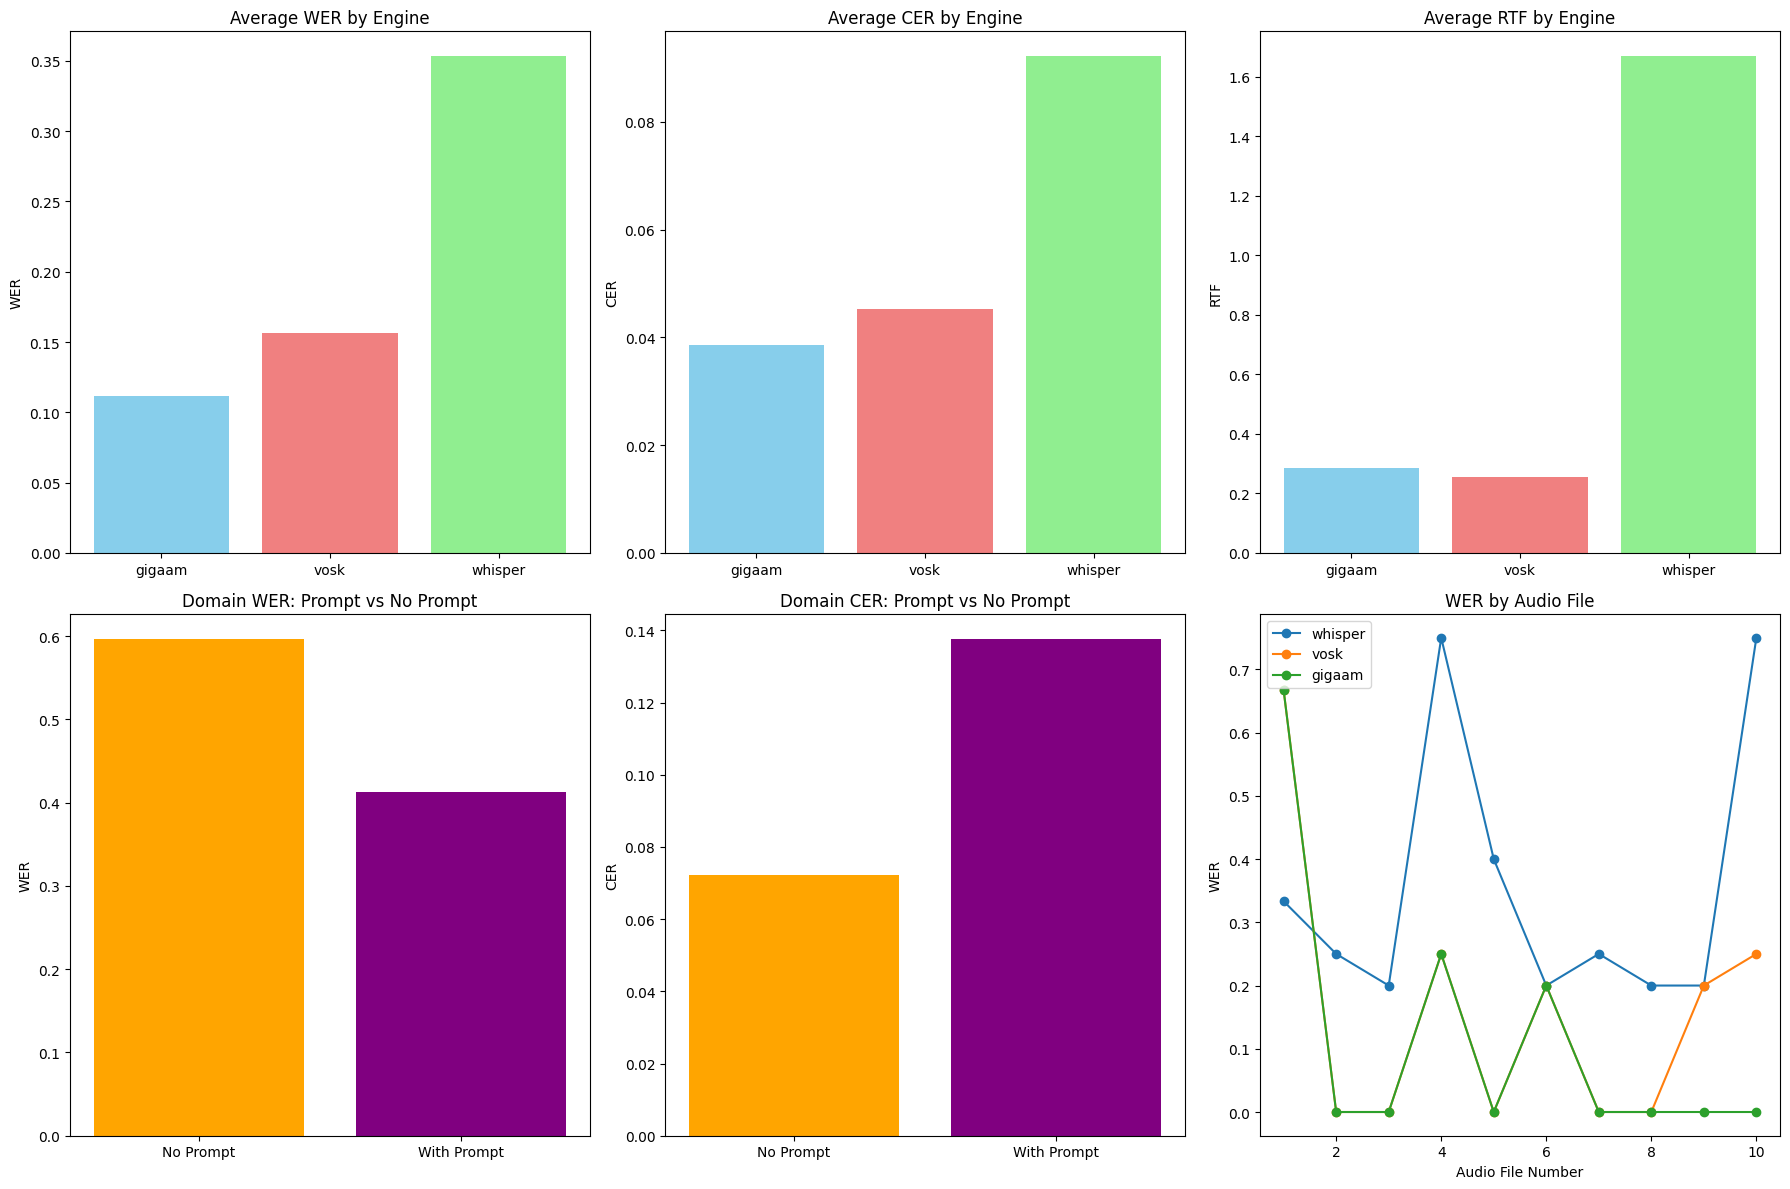


=== DETAILED MAIN RESULTS ===

audio_1:
Reference: Привет, как дела?
WHISPER: Привет!  Как дела?
  WER: 0.333, CER: 0.118, RTF: 2.851
VOSK: привет как дела
  WER: 0.667, CER: 0.118, RTF: 0.231
GIGAAM: привет как дела
  WER: 0.667, CER: 0.118, RTF: 1.152

audio_2:
Reference: Спорт помогает сохранять здоровье
WHISPER: Спорт помогает сохранять здоровье.
  WER: 0.250, CER: 0.030, RTF: 1.347
VOSK: спорт помогает сохранять здоровье
  WER: 0.000, CER: 0.000, RTF: 0.327
GIGAAM: спорт помогает сохранять здоровье
  WER: 0.000, CER: 0.000, RTF: 0.180

audio_3:
Reference: Сегодня хорошая погода для прогулки
WHISPER: Сегодня хорошая погода для прогулки.
  WER: 0.200, CER: 0.029, RTF: 1.493
VOSK: сегодня хорошая погода для прогулки
  WER: 0.000, CER: 0.000, RTF: 0.258
GIGAAM: сегодня хорошая погода для прогулки
  WER: 0.000, CER: 0.000, RTF: 0.229

audio_4:
Reference: Москва - столица России
WHISPER: Москва столится России.
  WER: 0.750, CER: 0.261, RTF: 1.601
VOSK: москва столица россии
  WER: 0.2

In [11]:

import pandas as pd
import matplotlib.pyplot as plt


# Analysis and Visualization
def analyze_results(main_results, domain_results):
    """Analyze and visualize results"""
    
    # Convert main results to DataFrame for easier analysis
    main_data = []
    for audio_name, data in main_results.items():
        for engine in ['whisper', 'vosk', 'gigaam']:
            if engine in data:
                main_data.append({
                    'audio': audio_name,
                    'engine': engine,
                    'wer': data[engine]['wer'],
                    'cer': data[engine]['cer'],
                    'rtf': data[engine]['rtf']
                })
    
    main_df = pd.DataFrame(main_data)
    
    # Convert domain results to DataFrame
    domain_data = []
    for domain_name, data in domain_results.items():
        for prompt_type in ['no_prompt', 'with_prompt']:
            if prompt_type in data:
                domain_data.append({
                    'domain': domain_name,
                    'prompt_type': prompt_type,
                    'wer': data[prompt_type]['wer'],
                    'cer': data[prompt_type]['cer'],
                    'rtf': data[prompt_type]['rtf']
                })
    
    domain_df = pd.DataFrame(domain_data)
    
    return main_df, domain_df

main_df, domain_df = analyze_results(main_results, domain_results)

# Display results
print("=== MAIN RESULTS SUMMARY ===")
print(main_df.groupby('engine')[['wer', 'cer', 'rtf']].mean())

print("\n=== DOMAIN RESULTS SUMMARY ===")
print(domain_df.groupby('prompt_type')[['wer', 'cer', 'rtf']].mean())

# Visualization
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Main results - WER
wer_means = main_df.groupby('engine')['wer'].mean()
axes[0,0].bar(wer_means.index, wer_means.values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Average WER by Engine')
axes[0,0].set_ylabel('WER')

# Main results - CER
cer_means = main_df.groupby('engine')['cer'].mean()
axes[0,1].bar(cer_means.index, cer_means.values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,1].set_title('Average CER by Engine')
axes[0,1].set_ylabel('CER')

# Main results - RTF
rtf_means = main_df.groupby('engine')['rtf'].mean()
axes[0,2].bar(rtf_means.index, rtf_means.values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,2].set_title('Average RTF by Engine')
axes[0,2].set_ylabel('RTF')

# Domain results - WER comparison
domain_wer_means = domain_df.groupby('prompt_type')['wer'].mean()
axes[1,0].bar(['No Prompt', 'With Prompt'], domain_wer_means.values, color=['orange', 'purple'])
axes[1,0].set_title('Domain WER: Prompt vs No Prompt')
axes[1,0].set_ylabel('WER')

# Domain results - CER comparison
domain_cer_means = domain_df.groupby('prompt_type')['cer'].mean()
axes[1,1].bar(['No Prompt', 'With Prompt'], domain_cer_means.values, color=['orange', 'purple'])
axes[1,1].set_title('Domain CER: Prompt vs No Prompt')
axes[1,1].set_ylabel('CER')

# Detailed WER by audio file
for engine in main_df['engine'].unique():
    engine_data = main_df[main_df['engine'] == engine]
    axes[1,2].plot(range(1, len(engine_data) + 1), engine_data['wer'].values, marker='o', label=engine)

axes[1,2].set_title('WER by Audio File')
axes[1,2].set_xlabel('Audio File Number')
axes[1,2].set_ylabel('WER')
axes[1,2].legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\n=== DETAILED MAIN RESULTS ===")
for audio_name, data in main_results.items():
    print(f"\n{audio_name}:")
    print(f"Reference: {data['reference']}")
    for engine in ['whisper', 'vosk', 'gigaam']:
        if engine in data:
            print(f"{engine.upper()}: {data[engine]['text']}")
            print(f"  WER: {data[engine]['wer']:.3f}, CER: {data[engine]['cer']:.3f}, RTF: {data[engine]['rtf']:.3f}")

print("\n=== DETAILED DOMAIN RESULTS ===")
for domain_name, data in domain_results.items():
    print(f"\n{domain_name}:")
    print(f"Reference: {data['reference']}")
    for prompt_type in ['no_prompt', 'with_prompt']:
        if prompt_type in data:
            print(f"{prompt_type}: {data[prompt_type]['text']}")
            print(f"  WER: {data[prompt_type]['wer']:.3f}, CER: {data[prompt_type]['cer']:.3f}, RTF: {data[prompt_type]['rtf']:.3f}")

**5. Финальный анализ и выводы**

In [12]:
# Final analysis
def calculate_improvement(domain_df):
    """Calculate improvement from using prompts"""
    no_prompt_mean = domain_df[domain_df['prompt_type'] == 'no_prompt'][['wer', 'cer']].mean()
    with_prompt_mean = domain_df[domain_df['prompt_type'] == 'with_prompt'][['wer', 'cer']].mean()
    
    wer_improvement = (no_prompt_mean['wer'] - with_prompt_mean['wer']) / no_prompt_mean['wer'] * 100
    cer_improvement = (no_prompt_mean['cer'] - with_prompt_mean['cer']) / no_prompt_mean['cer'] * 100
    
    return wer_improvement, cer_improvement

wer_imp, cer_imp = calculate_improvement(domain_df)

print("=== FINAL CONCLUSIONS ===")
print(f"Best engine by WER: {main_df.groupby('engine')['wer'].mean().idxmin()}")
print(f"Best engine by CER: {main_df.groupby('engine')['cer'].mean().idxmin()}")
print(f"Fastest engine: {main_df.groupby('engine')['rtf'].mean().idxmin()}")
print(f"Prompt improvement - WER: {wer_imp:.1f}%, CER: {cer_imp:.1f}%")

# Save results to CSV
main_df.to_csv('main_results.csv', index=False)
domain_df.to_csv('domain_results.csv', index=False)

print("\nResults saved to main_results.csv and domain_results.csv")

=== FINAL CONCLUSIONS ===
Best engine by WER: gigaam
Best engine by CER: gigaam
Fastest engine: vosk
Prompt improvement - WER: 30.7%, CER: -90.2%

Results saved to main_results.csv and domain_results.csv
